In [1]:
from sklearn.datasets import load_wine
import pandas as pd
import numpy as np
np.set_printoptions(precision=4)
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [2]:
wine = load_wine()
X = pd.DataFrame(wine.data, columns=wine.feature_names)
y = pd.Categorical.from_codes(wine.target, wine.target_names)

In [3]:
X

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [4]:
y

['class_0', 'class_0', 'class_0', 'class_0', 'class_0', ..., 'class_2', 'class_2', 'class_2', 'class_2', 'class_2']
Length: 178
Categories (3, object): ['class_0', 'class_1', 'class_2']

In [5]:
X.shape

(178, 13)

In [6]:
X.shape

(178, 13)

In [7]:
wine.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [8]:
df = X.join(pd.Series(y, name='class'))

In [9]:
df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,class_0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,class_0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,class_0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,class_0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,class_0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,class_2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,class_2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,class_2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,class_2


In [10]:
class_feature_means = pd.DataFrame(columns=wine.target_names)
for c, rows in df.groupby('class'):
    print(rows)
    class_feature_means[c] = rows.mean()
class_feature_means

    alcohol  malic_acid   ash  ...  od280/od315_of_diluted_wines  proline    class
0     14.23        1.71  2.43  ...                          3.92   1065.0  class_0
1     13.20        1.78  2.14  ...                          3.40   1050.0  class_0
2     13.16        2.36  2.67  ...                          3.17   1185.0  class_0
3     14.37        1.95  2.50  ...                          3.45   1480.0  class_0
4     13.24        2.59  2.87  ...                          2.93    735.0  class_0
5     14.20        1.76  2.45  ...                          2.85   1450.0  class_0
6     14.39        1.87  2.45  ...                          3.58   1290.0  class_0
7     14.06        2.15  2.61  ...                          3.58   1295.0  class_0
8     14.83        1.64  2.17  ...                          2.85   1045.0  class_0
9     13.86        1.35  2.27  ...                          3.55   1045.0  class_0
10    14.10        2.16  2.30  ...                          3.17   1510.0  class_0
11  

,class_0,class_1,class_2
alcohol,13.744746,12.278732,13.153750
malic_acid,2.010678,1.932676,3.333750
ash,2.455593,2.244789,2.437083
alcalinity_of_ash,17.037288,20.238028,21.416667
magnesium,106.338983,94.549296,99.312500
total_phenols,2.840169,2.258873,1.678750
flavanoids,2.982373,2.080845,0.781458
nonflavanoid_phenols,0.290000,0.363662,0.447500
proanthocyanins,1.899322,1.630282,1.153542
color_intensity,5.528305,3.086620,7.396250


In [11]:
class_feature_means.shape

(13, 3)

In [12]:
within_class_scatter_matrix = np.zeros((13,13))
for c, rows in df.groupby('class'):
    rows = rows.drop(['class'], axis=1)
    s = np.zeros((13,13))

    for index, row in rows.iterrows():
        print("Index"+str(index))
        print(row)
        x, mc = row.values.reshape(13,1), class_feature_means[c].values.reshape(13,1)
        s += (x - mc).dot((x - mc).T)
        within_class_scatter_matrix += s


Index0
alcohol                           14.23
malic_acid                         1.71
ash                                2.43
alcalinity_of_ash                 15.60
magnesium                        127.00
total_phenols                      2.80
flavanoids                         3.06
nonflavanoid_phenols               0.28
proanthocyanins                    2.29
color_intensity                    5.64
hue                                1.04
od280/od315_of_diluted_wines       3.92
proline                         1065.00
Name: 0, dtype: float64
Index1
alcohol                           13.20
malic_acid                         1.78
ash                                2.14
alcalinity_of_ash                 11.20
magnesium                        100.00
total_phenols                      2.65
flavanoids                         2.76
nonflavanoid_phenols               0.26
proanthocyanins                    1.28
color_intensity                    4.38
hue                                1.05
od

In [13]:
rows.shape

(48, 13)

In [14]:
feature_means = df.mean()

In [15]:
feature_means

alcohol                          13.000618
malic_acid                        2.336348
ash                               2.366517
alcalinity_of_ash                19.494944
magnesium                        99.741573
total_phenols                     2.295112
flavanoids                        2.029270
nonflavanoid_phenols              0.361854
proanthocyanins                   1.590899
color_intensity                   5.058090
hue                               0.957449
od280/od315_of_diluted_wines      2.611685
proline                         746.893258
dtype: float64

In [16]:
between_class_scatter_matrix = np.zeros((13,13))

In [17]:
for c in class_feature_means:    
    n = len(df.loc[df['class'] == c].index)
    mc, m = class_feature_means[c].values.reshape(13,1), feature_means.values.reshape(13,1)
    between_class_scatter_matrix += n * (mc - m).dot((mc - m).T)

In [18]:
eigen_values, eigen_vectors = np.linalg.eig(np.linalg.inv(within_class_scatter_matrix).dot(between_class_scatter_matrix))

In [19]:
eigen_values

array([ 0.0000e+00+0.0000e+00j,  1.3793e-01+0.0000e+00j,
        2.8158e-01+0.0000e+00j,  2.2582e-17+0.0000e+00j,
       -2.9345e-17+0.0000e+00j, -2.2430e-17+0.0000e+00j,
       -6.2775e-18+1.6278e-17j, -6.2775e-18-1.6278e-17j,
        9.4714e-18+4.3723e-18j,  9.4714e-18-4.3723e-18j,
       -6.6504e-18+0.0000e+00j,  1.1215e-18+4.1086e-18j,
        1.1215e-18-4.1086e-18j])

In [20]:
eigen_vectors

array([[-5.6722e-01+0.0000e+00j,  2.0820e-01+0.0000e+00j,
         4.7861e-02+0.0000e+00j, -1.8559e-01+0.0000e+00j,
         8.3737e-02+0.0000e+00j,  2.3986e-02+0.0000e+00j,
         4.0953e-01-3.8175e-01j,  4.0953e-01+3.8175e-01j,
         3.1675e-01+6.7791e-02j,  3.1675e-01-6.7791e-02j,
         8.5870e-01+0.0000e+00j,  5.4342e-01-4.4518e-02j,
         5.4342e-01+4.4518e-02j],
       [ 9.4484e-02+0.0000e+00j,  1.1467e-01+0.0000e+00j,
        -5.3398e-02+0.0000e+00j,  3.3594e-02+0.0000e+00j,
         1.2753e-02+0.0000e+00j, -1.8757e-02+0.0000e+00j,
        -1.1314e-01+2.2902e-02j, -1.1314e-01-2.2902e-02j,
        -5.6088e-02-9.0014e-03j, -5.6088e-02+9.0014e-03j,
        -1.6210e-01+0.0000e+00j, -9.8555e-02-7.4443e-03j,
        -9.8555e-02+7.4443e-03j],
       [ 6.4094e-01+0.0000e+00j,  6.8287e-01+0.0000e+00j,
         1.2265e-01+0.0000e+00j,  3.6906e-01+0.0000e+00j,
         6.0711e-01+0.0000e+00j, -5.3266e-01+0.0000e+00j,
        -1.7227e-01+7.5739e-02j, -1.7227e-01-7.5739e-02j,
    

In [21]:
pairs = [(np.abs(eigen_values[i]), eigen_vectors[:,i]) for i in range(len(eigen_values))]

In [22]:
pairs

[(0.0,
  array([-5.6722e-01+0.j,  9.4484e-02+0.j,  6.4094e-01+0.j, -4.9609e-02+0.j,
         -2.1340e-04+0.j, -6.2138e-02+0.j, -1.3457e-02+0.j, -4.3565e-01+0.j,
         -8.5198e-02+0.j,  4.7358e-02+0.j, -2.0438e-01+0.j,  1.0470e-01+0.j,
          7.0182e-04+0.j])),
 (0.13792561974216477,
  array([ 2.0820e-01+0.j,  1.1467e-01+0.j,  6.8287e-01+0.j, -4.5438e-02+0.j,
         -6.7868e-04+0.j, -2.5385e-02+0.j, -1.2078e-01+0.j, -6.1484e-01+0.j,
         -6.8194e-02+0.j,  7.1309e-02+0.j, -2.6328e-01+0.j,  5.2991e-02+0.j,
          6.3609e-04+0.j])),
 (0.28157790627842627,
  array([ 0.0479+0.j, -0.0534+0.j,  0.1226+0.j, -0.0474+0.j,  0.0023+0.j,
         -0.2203+0.j,  0.5409+0.j,  0.686 +0.j, -0.1316+0.j, -0.0974+0.j,
          0.1933+0.j,  0.319 +0.j,  0.0007+0.j])),
 (2.2581979773292413e-17,
  array([-1.8559e-01+0.j,  3.3594e-02+0.j,  3.6906e-01+0.j, -1.6259e-03+0.j,
         -7.6368e-04+0.j,  8.5787e-02+0.j, -1.3797e-01+0.j, -8.9461e-01+0.j,
          3.1886e-02+0.j, -2.0610e-03+0.j, -1.12

In [23]:
pairs = sorted(pairs, key=lambda x: x[0], reverse=True)

In [24]:
for pair in pairs:
    print(pair[0])

0.28157790627842627
0.13792561974216477
2.9345059606615343e-17
2.2581979773292413e-17
2.2430233269730446e-17
1.7446905970608937e-17
1.7446905970608937e-17
1.0431887387444364e-17
1.0431887387444364e-17
6.6503695446060135e-18
4.258891046277207e-18
4.258891046277207e-18
0.0


In [25]:
eigen_value_sums = sum(eigen_values)

In [29]:
print('Explained Variance')
for i, pair in enumerate(pairs):
    print('Eigenvector {}: {}'.format(i, (pair[0]/eigen_value_sums).real))

Explained Variance
Eigenvector 0: 0.6712170191976056
Eigenvector 1: 0.3287829808023945
Eigenvector 2: 6.995187831907512e-17
Eigenvector 3: 5.3830250218645344e-17
Eigenvector 4: 5.3468521426991475e-17
Eigenvector 5: 4.158941436347443e-17
Eigenvector 6: 4.158941436347443e-17
Eigenvector 7: 2.486722218142291e-17
Eigenvector 8: 2.486722218142291e-17
Eigenvector 9: 1.5852952674060682e-17
Eigenvector 10: 1.0152217519306769e-17
Eigenvector 11: 1.0152217519306769e-17
Eigenvector 12: 0.0


In [31]:
w_matrix = np.hstack((pairs[0][1].reshape(13,1), pairs[1][1].reshape(13,1))).real

In [32]:
w_matrix

array([[ 4.7861e-02,  2.0820e-01],
       [-5.3398e-02,  1.1467e-01],
       [ 1.2265e-01,  6.8287e-01],
       [-4.7352e-02, -4.5438e-02],
       [ 2.2633e-03, -6.7868e-04],
       [-2.2028e-01, -2.5385e-02],
       [ 5.4086e-01, -1.2078e-01],
       [ 6.8598e-01, -6.1484e-01],
       [-1.3157e-01, -6.8194e-02],
       [-9.7395e-02,  7.1309e-02],
       [ 1.9334e-01, -2.6328e-01],
       [ 3.1901e-01,  5.2991e-02],
       [ 7.0427e-04,  6.3609e-04]])

In [33]:
X.shape

(178, 13)

In [34]:
w_matrix.shape

(13, 2)

In [47]:
X

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [48]:
w_matrix

array([[ 4.7861e-02,  2.0820e-01],
       [-5.3398e-02,  1.1467e-01],
       [ 1.2265e-01,  6.8287e-01],
       [-4.7352e-02, -4.5438e-02],
       [ 2.2633e-03, -6.7868e-04],
       [-2.2028e-01, -2.5385e-02],
       [ 5.4086e-01, -1.2078e-01],
       [ 6.8598e-01, -6.1484e-01],
       [-1.3157e-01, -6.8194e-02],
       [-9.7395e-02,  7.1309e-02],
       [ 1.9334e-01, -2.6328e-01],
       [ 3.1901e-01,  5.2991e-02],
       [ 7.0427e-04,  6.3609e-04]])

In [35]:
X_lda = np.array(X.dot(w_matrix))

In [36]:
X_lda.shape

(178, 2)

In [49]:
X_lda

array([[-4.7002,  1.9791],
       [-4.302 ,  1.1704],
       [-3.4207,  1.4291],
       [-4.2058,  4.0029],
       [-1.51  ,  0.4512],
       [-4.5187,  3.2131],
       [-4.5274,  3.2691],
       [-4.1483,  3.1041],
       [-3.8608,  1.9534],
       [-3.3666,  1.6786],
       [-4.8059,  2.2354],
       [-3.4281,  2.1751],
       [-3.6661,  2.2625],
       [-5.5882,  2.0548],
       [-5.5013,  3.613 ],
       [-3.1848,  2.8895],
       [-3.2894,  2.7658],
       [-2.9981,  1.4251],
       [-5.2464,  3.7098],
       [-3.1365,  1.9769],
       [-3.5775,  0.5625],
       [-1.6908,  0.9134],
       [-4.8352,  0.9148],
       [-3.0959,  0.6174],
       [-3.3216,  0.2985],
       [-2.1448,  0.1637],
       [-3.9824,  2.1752],
       [-2.6859,  1.2185],
       [-3.5631,  1.0382],
       [-3.173 ,  1.3779],
       [-2.9963,  1.3242],
       [-3.5687,  2.3407],
       [-3.3851,  0.2012],
       [-3.5275,  1.7159],
       [-2.8519,  1.4707],
       [-2.7941,  0.2379],
       [-2.7581,  1.5697],
 

In [37]:
le = LabelEncoder()

In [38]:
df['class']

0      class_0
1      class_0
2      class_0
3      class_0
4      class_0
        ...   
173    class_2
174    class_2
175    class_2
176    class_2
177    class_2
Name: class, Length: 178, dtype: category
Categories (3, object): ['class_0', 'class_1', 'class_2']

In [39]:
y = le.fit_transform(df['class'])

In [40]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [42]:
X_lda[:,0]

array([ 3.0179e+00,  3.0147e+00,  2.6426e+00,  2.8173e+00,  2.2189e+00,
        2.9831e+00,  2.9093e+00,  2.9189e+00,  2.7258e+00,  2.6491e+00,
        2.9669e+00,  2.6426e+00,  2.7176e+00,  3.2076e+00,  3.1423e+00,
        2.6635e+00,  2.6386e+00,  2.6412e+00,  3.2082e+00,  2.6422e+00,
        2.7284e+00,  2.2007e+00,  3.0839e+00,  2.6334e+00,  2.6552e+00,
        2.4220e+00,  2.8998e+00,  2.4795e+00,  2.7405e+00,  2.5238e+00,
        2.4985e+00,  2.7004e+00,  2.6947e+00,  2.8234e+00,  2.5621e+00,
        2.5096e+00,  2.6117e+00,  2.3843e+00,  2.6461e+00,  2.6236e+00,
        2.5744e+00,  2.3556e+00,  3.0500e+00,  2.1183e+00,  2.4828e+00,
        2.4475e+00,  2.7164e+00,  2.6575e+00,  2.3110e+00,  2.7258e+00,
        2.5602e+00,  2.8784e+00,  2.9814e+00,  2.7394e+00,  2.6370e+00,
        2.1527e+00,  2.4955e+00,  2.7982e+00,  2.7688e+00,  1.3747e+00,
        1.7330e+00,  1.2641e+00,  1.9086e+00,  1.8976e+00,  1.8088e+00,
        2.0798e+00,  2.2585e+00,  1.9088e+00,  1.8219e+00,  1.78

In [43]:
X_lda[:,1]

array([4.2676, 4.0731, 4.1372, 4.7211, 3.8762, 4.507 , 4.5837, 4.5237,
       4.2134, 4.1813, 4.3007, 4.2618, 4.3082, 4.2734, 4.6774, 4.4931,
       4.3921, 4.0411, 4.6397, 4.3483, 3.9175, 4.108 , 4.0101, 3.929 ,
       3.8578, 3.7757, 4.2806, 3.9852, 4.0364, 4.0949, 4.0283, 4.2847,
       3.7704, 4.1036, 4.1007, 3.8042, 4.17  , 3.975 , 3.6555, 4.5372,
       3.807 , 3.9948, 4.4328, 3.9035, 3.628 , 4.4998, 4.3209, 3.9739,
       4.0808, 4.2531, 4.0198, 4.3401, 4.3111, 4.474 , 4.1262, 4.0509,
       4.1634, 4.3248, 4.3301, 3.0405, 3.2807, 3.2685, 3.381 , 2.9654,
       3.0601, 3.3904, 3.0675, 3.0928, 3.5984, 3.0352, 3.4063, 3.322 ,
       3.329 , 3.2244, 3.3239, 2.9763, 3.052 , 3.2809, 3.1352, 3.1663,
       2.5887, 3.3968, 2.989 , 3.4996, 3.3324, 3.1373, 2.8358, 2.9394,
       3.1749, 2.9281, 3.0726, 3.0666, 3.0762, 3.1081, 3.0764, 3.1569,
       3.5979, 2.9225, 3.0227, 2.8504, 2.9888, 3.1078, 3.3378, 2.7043,
       3.1329, 2.9415, 3.1247, 3.1149, 2.7278, 3.2143, 2.8307, 3.0309,
      

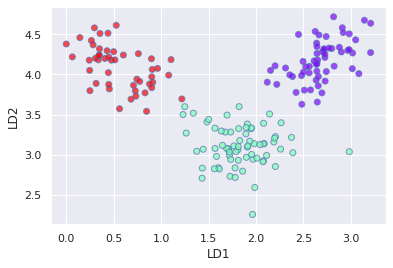

In [41]:
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.scatter(
    X_lda[:,0],
    X_lda[:,1],
    c=y,
    cmap='rainbow',
    alpha=0.7,
    edgecolors='b'
)

In [44]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
X_lda = lda.fit_transform(X, y)

In [45]:
lda.explained_variance_ratio_

array([0.6875, 0.3125])

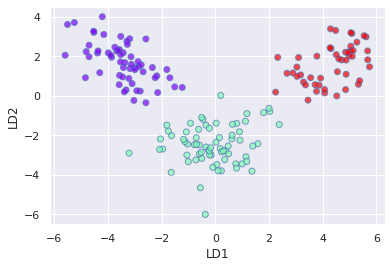

In [46]:
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.scatter(
    X_lda[:,0],
    X_lda[:,1],
    c=y,
    cmap='rainbow',
    alpha=0.7,
    edgecolors='b'
)

In [50]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X, y)

In [51]:
pca.explained_variance_ratio_

array([0.9981, 0.0017])

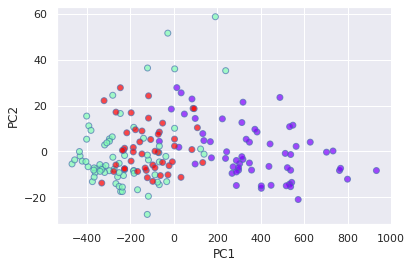

In [52]:
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.scatter(
    X_pca[:,0],
    X_pca[:,1],
    c=y,
    cmap='rainbow',
    alpha=0.7,
    edgecolors='b'
)

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X_lda, y, random_state=1)

In [54]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[18,  0,  0],
       [ 0, 17,  0],
       [ 0,  0, 10]])